# **Artificial Neuron: Perceptron**

---

The goal is to build **an artificial neuron** which will be able to **classify the data points into two classes**. The neuron will be trained using the perceptron learning rule. The neuron will be trained on data points generated using the `make_blobs` function from the `sklearn.datasets` module.

# **I- Dataset**

Let's first generate the dataset using the `make_blobs` function from the `sklearn.datasets` module. The `make_blobs` function can generate points belonging to two or more classes. The points belonging to two classes are linearly separable. The `make_blobs` function returns a tuple containing the data points and the labels. The labels are the class to which the data point belongs to. The `make_blobs` function takes the following parameters:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimensions de X: (100, 2)
dimensions de y: (100, 1)


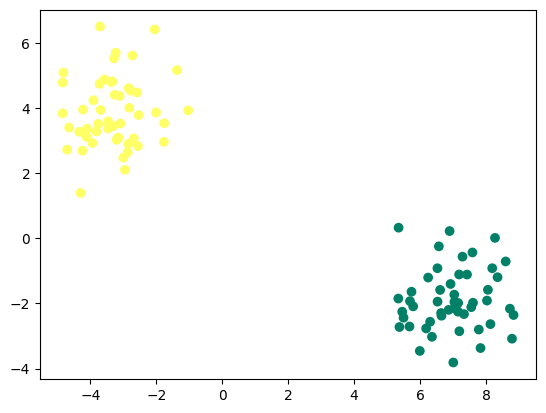

In [21]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

Every point in the dataset is a two-dimensional point. The `make_blobs` function allows us to separate these points into two classes that we will call class 0 and class 1. We want to separate these classes with a linear model.

# **II- Perceptron**

The first step is to initialise the weights and the bias. The weights and the bias are initialised to random values at first. The weights and the bias are stored in variables called `W` and `b`. The `parameters` dictionary contains the weights and the bias. The weights are stored in a NumPy array called `weights`. The bias is stored in a variable called `bias`. The `parameters` dictionary is returned by the `initialise_parameters` function. The `initialise_parameters` function takes the following parameters:

In [22]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [23]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [24]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [25]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [26]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [27]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)
    

1.0


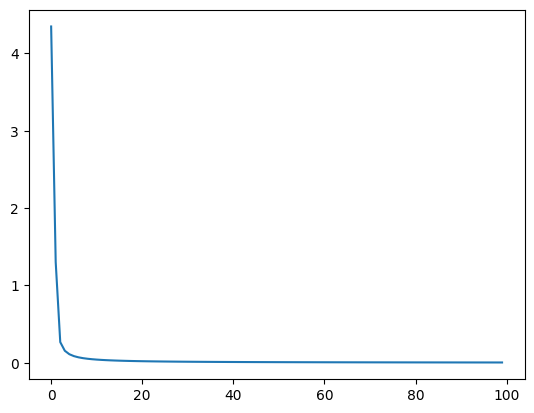

In [30]:
W, b = artificial_neuron(X, y)

# 3. Frontiere de décision

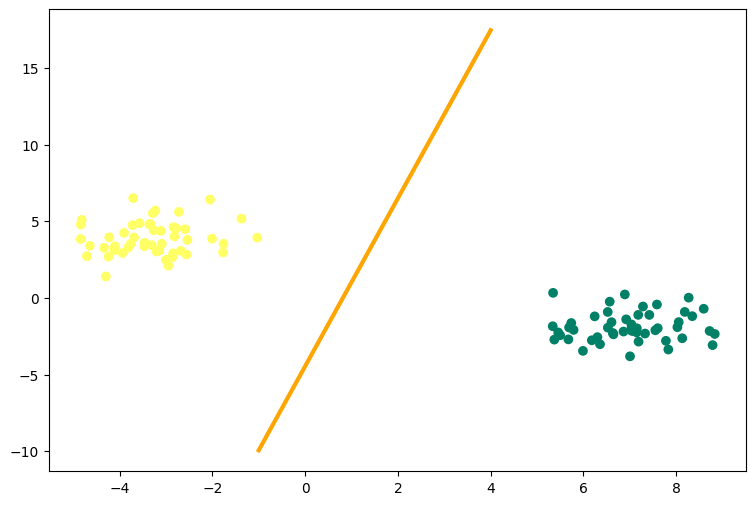

In [31]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

# 4. Visualisations 3D

In [32]:
import plotly.graph_objects as go

In [33]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [34]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "perspective"
fig.show()


# Exercice - Cat vs Dog

In [35]:
from utilities import *

ModuleNotFoundError: No module named 'utilities'

In [ ]:
X_train, y_train, X_test, y_test = load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [ ]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


/home/lois/.local/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



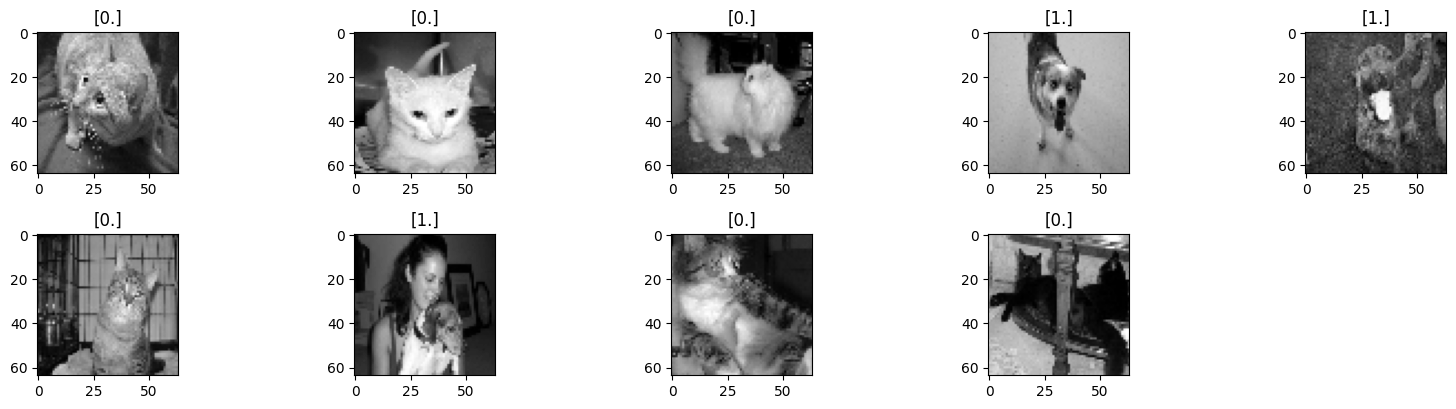

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [ ]:
# TO DO 
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
# 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
# 5. Partager vos conclusions dans les commentaires !